In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('/home/user/Desktop/OJT-Study/python/PE-Header/preprocessed_data.csv', sep='|')

In [6]:
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,label
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,0
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,0
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,0
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,0
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,0


In [7]:
data.drop(columns = ['Name', 'md5'], inplace = True)

In [8]:
data.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,label
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,0
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,0
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,0
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,0
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Machine                      138047 non-null  int64  
 1   SizeOfOptionalHeader         138047 non-null  int64  
 2   Characteristics              138047 non-null  int64  
 3   MajorLinkerVersion           138047 non-null  int64  
 4   MinorLinkerVersion           138047 non-null  int64  
 5   SizeOfCode                   138047 non-null  int64  
 6   SizeOfInitializedData        138047 non-null  int64  
 7   SizeOfUninitializedData      138047 non-null  int64  
 8   AddressOfEntryPoint          138047 non-null  int64  
 9   BaseOfCode                   138047 non-null  int64  
 10  BaseOfData                   138047 non-null  int64  
 11  ImageBase                    138047 non-null  float64
 12  SectionAlignment             138047 non-null  int64  
 13 

In [10]:
!pip install scikit-learn -q


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = data['label']
X = data.drop(columns = ['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [12]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
result = rf_classifier.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
print("Random Forest Classifier model")
print("Accuracy: ", accuracy_score(y_test, result))
print(confusion_matrix(y_test, result))
print(classification_report(y_test, result))

Random Forest Classifier model
Accuracy:  0.9951829047446578
[[ 8206    59]
 [   74 19271]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8265
           1       1.00      1.00      1.00     19345

    accuracy                           1.00     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       1.00      1.00      1.00     27610



In [16]:
!pip install matplotlib -q


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

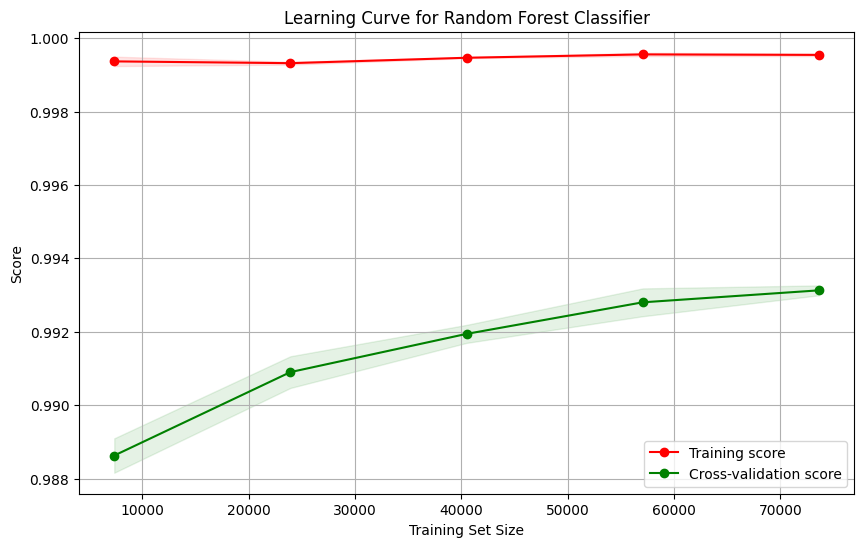

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X_train, y_train, cv=3, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(
    train_sizes, 
    train_scores_mean - train_scores_std, 
    train_scores_mean + train_scores_std, 
    alpha=0.1, color="r"
)
plt.fill_between(
    train_sizes, 
    test_scores_mean - test_scores_std, 
    test_scores_mean + test_scores_std, 
    alpha=0.1, color="g"
)

plt.title("Learning Curve for Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()
